### Testing custom package

In [2]:
from nav_pii_anon.spacy.spacy_model import SpacyModel
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
tx = ("Mitt navn er Marius og mitt personnummer er 15044216652Marius. "
      "Telefonnummeret mitt er 94867658 og jeg reiser "
      "hjem 24.07.2020")

In [4]:
print(tx)

Mitt navn er Marius og mitt personnummer er 15044216652Marius. Telefonnummeret mitt er 94867658 og jeg reiser hjem 24.07.2020


In [5]:
nlp = SpacyModel()

In [6]:
nlp.add_patterns(before_ner = False)

In [7]:
nlp.predict(tx)

[['Marius', 'PER', 3, 4, 'NA'], ['94867658', 'TLF', 13, 14, 'NA'], ['24.07.2020', 'LOC', 18, 19, 'NA']]


In [8]:
nlp.replace(tx, "pad")

'Mitt navn er ~~~~~~ og mitt personnummer er 15044216652~~~~~~. Telefonnummeret mitt er ~~~~~~~~ og jeg reiser hjem ~~~~~~~~~~'

In [9]:
nlp.similarity(tx, "pad")

0.9886545132334053

In [10]:
nlp.similarity(tx)

0.42254049166094004

In [11]:
nlp.similarity(tx, "shuffle")

0.9080528077455134

In [12]:
nlp.similarity(tx, "character")

0.8936695748710497

In [13]:
graph = nlp.dependency_graph(tx)

In [15]:
pos = nx.planar_layout(graph)

/usr/local/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


/usr/local/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


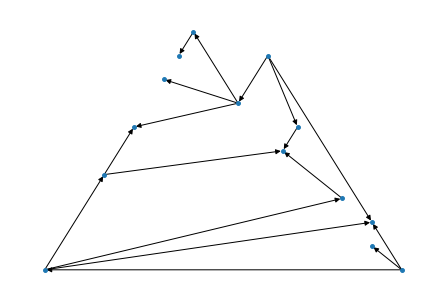

In [14]:
nx.draw_shell(graph, node_size=15)

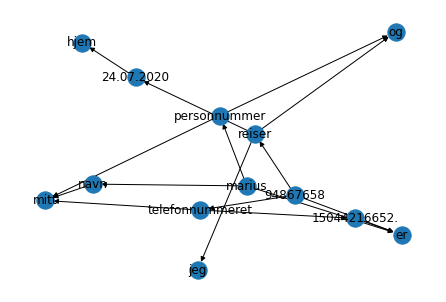

In [8]:
nx.draw(graph, with_labels=True)

In [ ]:
nlp.top_n_nodes(tx, 4)

In [ ]:
sorted(list(graph.degree), key= lambda x: x[1], reverse=True)

In [ ]:
nlp.similarity(tx)

In [ ]:
nlp.predict(tx)

In [ ]:
nlp.add_patterns()

In [ ]:
nlp.replace(tx)

In [ ]:
nlp.predict(tx)

In [ ]:
nlp.display_predictions(tx)